# Project: Insurance Policy Cancellation (DS)
---------------------------------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

*This dataset comes from the 2022 NESS Statathon (Theme 1) from 2022. An archived version of the website and related data has been posted on HuskyCT.*

**Challenge:** Using historical policy data, create a multiclass predictive model to predict the policies that are most likely to be canceled and those most likely to be renewed, as well as understand what variables are most influential in causing a policy cancellation.

For this theme, there are true answers, and a team should focus on proposing the best predictive model. The performance of a team will be mainly based on the predictive performance of the propose method measured by accuracy and the quality of the code. You can use Python's weighted F1 score to calculate the performance of for your model on the test partition.
  * Make sure you use the 'weighted' F1 score
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** Dave is deleting the rows where `cancel==-1`!

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
# https://drive.google.com/file/d/1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr/view?usp=share_link
# https://drive.google.com/file/d/1k8asF0dptYNn1DFkylSEpr0D9FstpIO4/view?usp=share_link
# https://drive.google.com/file/d/1KdOq5IQiwvpTy1XpAp9CLn7zXgFGNq9k/view?usp=share_link
# https://drive.google.com/file/d/1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG/view?usp=share_link

!gdown 1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
!gdown 1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
!gdown 1KdOq5IQiwvpTy1XpAp9CLn7zXgFGNq9k
!gdown 1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG

Downloading...
From: https://drive.google.com/uc?id=1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
To: /content/X_test.csv
100% 31.5M/31.5M [00:00<00:00, 181MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
To: /content/X_train.csv
100% 63.9M/63.9M [00:00<00:00, 73.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KdOq5IQiwvpTy1XpAp9CLn7zXgFGNq9k
To: /content/y_test.csv
100% 690k/690k [00:00<00:00, 44.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG
To: /content/y_train.csv
100% 1.40M/1.40M [00:00<00:00, 44.5MB/s]


# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work!

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like SMOTE, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

EDA part is following the sequence below:
1.  Loading a dataset, checking correlations, and distributions
2.  Drop unnecessary columns
3.  Make dummy variables of categorical variabels
4.  Drop missing values in Train dataset
5. Impute missing values in Test dataset
6. Separate to X_train, X_test, y_train, and y_test
7. Min/Max Scaler
8. PCA to reduce dimension
9. Resample with SMOTE
10. Done! some useful plots and tables

## 1. Loading a dataset, checking correlations, and distributions
---





Clean dataset first - drop unnecessary  column and drop  missing values







In [ ]:
# some basic packages
import pandas as pd
import numpy as np
# for resampling, import SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt
# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.decomposition import PCA
#Model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# classification spot check models!
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# more advanced ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

Load a dataset!

In [ ]:
# assign dataset to each partition
X_train_df = pd.read_csv('/content/X_train.csv')
X_test_df = pd.read_csv('/content/X_test.csv')
y_train_df = pd.read_csv('/content/y_train.csv')
y_test_df = pd.read_csv('/content/y_test.csv')

Combine X_train & Y_train as Train and X_test & y_test, because we need them as a whole to drop missing values!

In [ ]:
# combine X and y for now, because I need to see and delete those missing values as a whole.
Train = pd.concat([X_train_df, y_train_df], axis=1)
Test = pd.concat([X_test_df, y_test_df], axis=1)

Correlation check! Let's make a temporary dataframe combining Train and Test dataset as a whole to see the correlation.

In [ ]:
# this is a temporary dataset that we're not gonna use except for correlation check.
df = pd.concat([Train, Test], axis=0)

<ipython-input-6-b9577f03b4c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


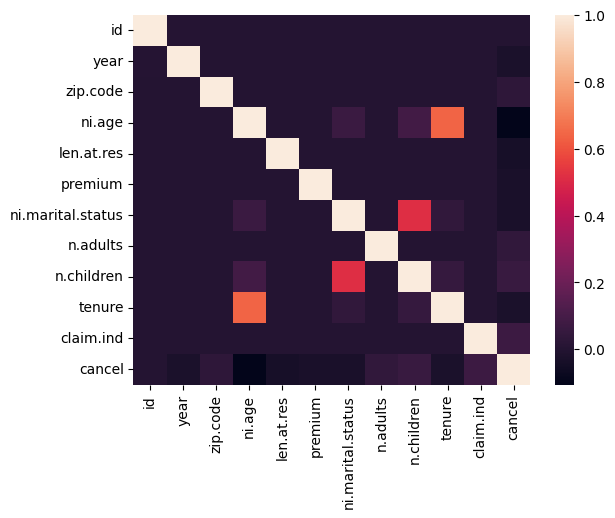

In [ ]:
import seaborn as sns
corr = df.corr(method='spearman')
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
corr = df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-7-a8949f93cf72>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


,id,year,zip.code,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind,cancel
id,1.000000,0.004133,0.000120,0.000254,-0.001411,0.001218,0.000267,0.000103,0.001891,0.000107,0.000537,0.000128
year,0.004133,1.000000,0.000799,-0.000159,-0.000411,0.001089,0.000183,-0.000926,0.000928,-0.001377,0.000543,-0.024452
zip.code,0.000120,0.000799,1.000000,0.000225,-0.000431,-0.000039,-0.000730,0.000532,0.000355,0.000224,-0.000997,0.030254
ni.age,0.000254,-0.000159,0.000225,1.000000,0.000298,-0.000043,0.065256,-0.001060,0.085562,0.637920,0.002010,-0.105310
len.at.res,-0.001411,-0.000411,-0.000431,0.000298,1.000000,0.001901,-0.001598,-0.000381,-0.001131,-0.001173,0.000046,-0.039478
premium,0.001218,0.001089,-0.000039,-0.000043,0.001901,1.000000,-0.000516,-0.001081,-0.000873,-0.001172,-0.000516,-0.027599
ni.marital.status,0.000267,0.000183,-0.000730,0.065256,-0.001598,-0.000516,1.000000,0.000382,0.515083,0.038403,-0.001355,-0.027818
n.adults,0.000103,-0.000926,0.000532,-0.001060,-0.000381,-0.001081,0.000382,1.000000,-0.000875,-0.001320,0.000213,0.038286
n.children,0.001891,0.000928,0.000355,0.085562,-0.001131,-0.000873,0.515083,-0.000875,1.000000,0.051134,-0.001139,0.061811
tenure,0.000107,-0.001377,0.000224,0.637920,-0.001173,-0.001172,0.038403,-0.001320,0.051134,1.000000,0.000839,-0.026298


As the dataset description says, id should be dropped because it barely has correlation with any column.

A few noticeable correlations are that ni.age & tenure, n.children & ni.lmarital.status

what does that mean?

> ni.age & tenure

ni.age - Age of policy holder

tenure - Number of years with Kangaroo

As the policy holder gets older, the Number of years with Kangaroo increases, which makes sense.

> n.children & ni.lmarital.status

n.children - Number of children in the property

ni.marital.status - Marital status of policyholder (0=no, 1=yes)

If the policy holder is married, number of children in the property increases (compared to those who are not married.)

Now, which variable has the highest correlation with the target variable, cancel?
It seems to be ni.age with a value of -0.105310 (yes, it is negative but it means ni.age and cancel impact negatively!)

what does that mean? the younger policy holder, the higher possibility of canceling the policy!

Now let's check the distribution of each column.

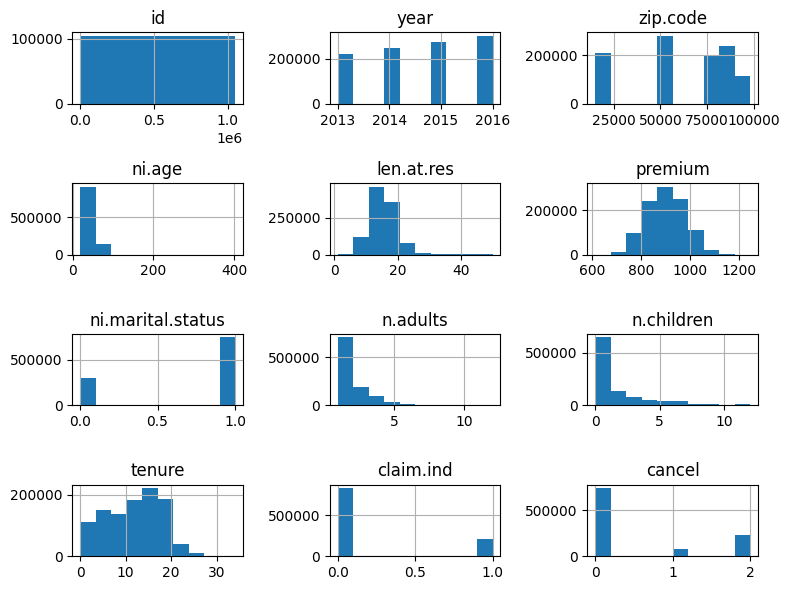

In [ ]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

## 2. Drop unnecessary column (id)


---



Drop the unnecessary column.

In [ ]:
# drop the unnecessary id column, just like the dataset description says!
Train = Train.drop(['id'], axis=1)
Test = Test.drop(['id'], axis=1)

A quick shape check

In [ ]:
# check the shape of Train and test
print(Train.shape)
print(Test.shape)

(700232, 17)
(344891, 17)


## 3. Make dummy variables of categorical variabels

---



Now take a look at each column's data type. We need all columns to be numeric for a modeling...

In [ ]:
# check the info for both dataset
print(Train.info())
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700232 entries, 0 to 700231
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               700232 non-null  int64  
 1   zip.code           699601 non-null  float64
 2   house.color        699612 non-null  object 
 3   ni.age             699524 non-null  float64
 4   len.at.res         699567 non-null  float64
 5   credit             699616 non-null  object 
 6   coverage.type      699569 non-null  object 
 7   dwelling.type      699581 non-null  object 
 8   premium            699608 non-null  float64
 9   sales.channel      699536 non-null  object 
 10  ni.gender          699589 non-null  object 
 11  ni.marital.status  699585 non-null  float64
 12  n.adults           699626 non-null  float64
 13  n.children         699616 non-null  float64
 14  tenure             699577 non-null  float64
 15  claim.ind          699574 non-null  float64
 16  ca

I see some categorical variables. I need those to be encoded as dummy variables.
But let me check their unique values first!

In [ ]:
# I see house.color, credit, coverage.type, dwelling.type, sales.channel, and ni.gender are categorical variable.
# let's check their unique values first.
print(Train['house.color'].unique())
print(Train['credit'].unique())
print(Train['coverage.type'].unique())
print(Train['dwelling.type'].unique())
print(Train['sales.channel'].unique())
print(Train['ni.gender'].unique())
# from Test dataset
print(Test['house.color'].unique())
print(Test['credit'].unique())
print(Test['coverage.type'].unique())
print(Test['dwelling.type'].unique())
print(Test['sales.channel'].unique())
print(Test['ni.gender'].unique())

['yellow' 'red' 'white' 'blue' nan]
['high' 'medium' 'low' nan]
['A' 'B' 'C' nan]
['House' 'Condo' 'Tenant' nan]
['Phone' 'Broker' 'Online' nan]
['F' 'M' nan]
['white' 'red' 'blue' 'yellow' nan]
['high' 'low' 'medium' nan]
['C' 'A' 'B' nan]
['House' 'Condo' 'Tenant' nan]
['Broker' 'Phone' 'Online' nan]
['F' 'M' nan]


The number of unique values in each column is at most 4 (except nan, we'll delete it soon.)

I can encode those as dummy variables. And after that, I will do the PCA to reduce dimension.

In [ ]:
# create dummy variables for categorical columns
Train = pd.get_dummies(Train, columns=['house.color', 'credit', 'coverage.type', 'dwelling.type', 'sales.channel', 'ni.gender'])
Test = pd.get_dummies(Test, columns=['house.color', 'credit', 'coverage.type', 'dwelling.type', 'sales.channel', 'ni.gender'])

In [ ]:
# check shape of them
print(Train.shape)
print(Test.shape)
# seems like too each has many columns. -> reduce dimension by doing PCA, but after dropping some missing values first!

(700232, 29)
(344891, 29)


The number of columns has changed from 17 to 29. But don't worry too much! will do PCA later.

## 4. Drop missing values in Train dataset

---



Now time to check on missing values.

In [ ]:
# check how much do we have missing values.
print('Train has', Train.isna().sum().sum(), 'missing values')
print('Test has', Test.isna().sum().sum(), 'missing values')

Train has 5810 missing values
Test has 2866 missing values


For both of X_train and X_test dataset doesn't have much of missing values compared to the number of their total rows.

So, dropping those missing values wouldn't hurt models as much!

In [ ]:
# drop missing values of training dataset
Train = Train.dropna()

## 5. Impute missing values in Test dataset

---



We can't drop missing values in Test dataset, because we want to know what real data looks like after training dataset. So, we need to impute missing values in Test dataset.

First, let's take a closer look at the missing data in Test dataset.

In [ ]:
# let's check which columns has missing values
Test.isna().sum()

year                      0
zip.code                313
ni.age                  293
len.at.res              295
premium                 331
ni.marital.status       345
n.adults                323
n.children              319
tenure                  323
claim.ind               324
cancel                    0
house.color_blue          0
house.color_red           0
house.color_white         0
house.color_yellow        0
credit_high               0
credit_low                0
credit_medium             0
coverage.type_A           0
coverage.type_B           0
coverage.type_C           0
dwelling.type_Condo       0
dwelling.type_House       0
dwelling.type_Tenant      0
sales.channel_Broker      0
sales.channel_Online      0
sales.channel_Phone       0
ni.gender_F               0
ni.gender_M               0
dtype: int64

Our target variable, 'cancel', doesn't have missing values.

If we impute missing vaues to test dataset as a whole wouldn't hurt the model's result.

In [ ]:
# use any() method to identify rows that contain missing values
missing_rows = Test.isna().any(axis=1)
# select only the rows containing missing values
missing_values = Test[missing_rows]
# let's take a look at missing values in Test dataset
missing_values

,year,zip.code,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind,...,coverage.type_B,coverage.type_C,dwelling.type_Condo,dwelling.type_House,dwelling.type_Tenant,sales.channel_Broker,sales.channel_Online,sales.channel_Phone,ni.gender_F,ni.gender_M
273,2013,98014.0,68.0,18.000000,997.586620,1.0,3.0,1.0,19.0,NaN,...,0,0,0,1,0,0,0,1,0,1
402,2016,80012.0,56.0,NaN,840.128719,1.0,1.0,0.0,9.0,1.0,...,1,0,0,1,0,0,0,1,0,1
605,2013,80101.0,54.0,16.000000,974.564308,NaN,2.0,1.0,11.0,1.0,...,1,0,1,0,0,0,0,1,1,0
636,2015,20165.0,51.0,NaN,915.702665,1.0,1.0,1.0,13.0,0.0,...,0,0,0,1,0,1,0,0,0,1
676,2016,15051.0,NaN,15.000000,901.107446,0.0,1.0,0.0,16.0,0.0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343938,2015,15012.0,58.0,21.478169,888.406996,1.0,3.0,4.0,13.0,NaN,...,0,1,0,1,0,1,0,0,1,0
343954,2015,15034.0,32.0,17.000000,843.971071,NaN,2.0,0.0,5.0,0.0,...,1,0,0,1,0,1,0,0,1,0
343998,2016,80047.0,41.0,NaN,931.800487,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1
344536,2013,15035.0,49.0,21.000000,826.509375,0.0,2.0,0.0,NaN,1.0,...,0,1,0,1,0,1,0,0,1,0


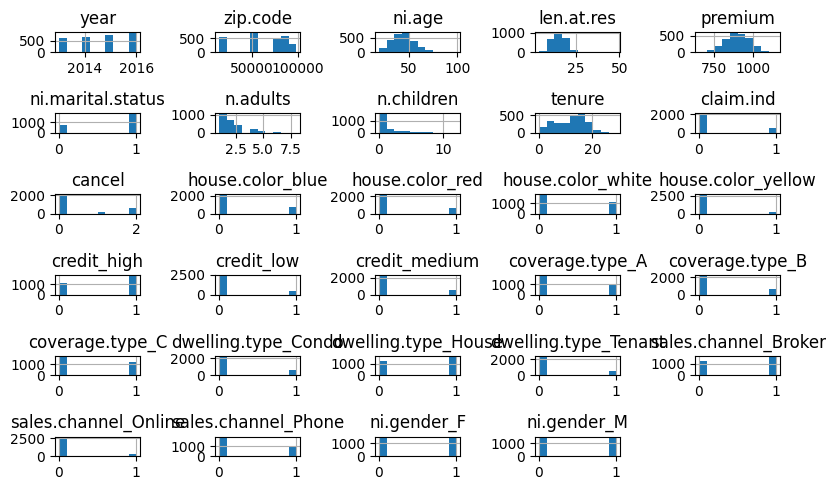

In [ ]:
# quick look at distribution of each missing value columns.
missing_values.hist(figsize=(8,5))
plt.tight_layout()
plt.show()

Impute missing values in Test dataset with mode values, because there are not much missing values in Test dataset, and imputing missing values with the most frequent values would not hurt model's performance as much.

In [ ]:
Test = Test.fillna(Test.mode()[['zip.code','ni.age', 'len.at.res', 'premium','ni.marital.status', 'n.adults', 'n.children', 'tenure', 'claim.ind']].to_dict('records')[0])

In [ ]:
# check the shape
print("Train shape:", Train.shape)
print("Test shape:", Test.shape)

Train shape: (694447, 29)
Test shape: (344891, 29)


## 6. Separate to X_train, X_test, y_train, and y_test


---



Finally! separate to X_train, X_test, y_train, and y_test. Almost there to fit a model!

In [ ]:
# now separate them
X_train = Train.drop(['cancel'], axis = 1)
X_test = Test.drop(['cancel'], axis = 1)
y_train = Train['cancel']
y_test = Test['cancel']

## 7. Min/Max Scaler


---



scale X dataset before jumping to modeling

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # learn and apply to train (from train)
X_test = scaler.transform(X_test) # simply TRANSFORM/APPLY to the test data (no leakage!)

## 8. PCA to reduce dimension


---





After min/max scaler, do PCA to reduce dimension!
Fit PCA on the standardized training data

In [ ]:
pca = PCA(n_components = 0.95) # this means keep components that maintain 95% of the variance
X_train_pca = pca.fit_transform(X_train)

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.shape

(694447, 15)

See how X_train dataset column reduced to 15 instead of 29?

Now apply that PCA to the test data

In [ ]:
X_test_pca = pca.transform(X_test)

In [ ]:
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.shape

(344891, 15)

In [ ]:
# sanity check! check the shape of each dataset
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train.shape)
print(y_test.shape)
# looks good!

(694447, 15)
(344891, 15)
(694447,)
(344891,)


## 9. Resample with SMOTE


---



Let's check how y_train is distributed.

In [ ]:
Counter(y_train)

Counter({0: 492416, 2: 151952, 1: 50079})

Way too imbalanced! use SMOTE to balance categories.

Let's see how it is distributed before SMOTE.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


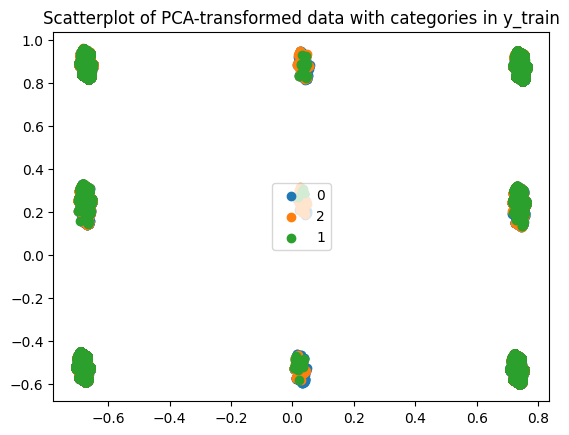

In [ ]:
counter = Counter(y_train)
for label, _ in counter.items():
    row_ix = where(y_train == label)[0]
    plt.scatter(X_train_pca.iloc[row_ix, 0], X_train_pca.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.title('Scatterplot of PCA-transformed data with categories in y_train')
plt.show()

Time to resample with SMOTE

In [ ]:
# Use SMOTE oversampling method to balance 0s, 1s, and 2s

# transform the dataset
oversample = SMOTE(k_neighbors=9)

# fit on the train model in resample
X_res, y_res = oversample.fit_resample(X_train_pca, y_train)
# summarize the new class distribution
counter = Counter(y_res)
print(counter)

Counter({0: 492416, 2: 492416, 1: 492416})


Neat!

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


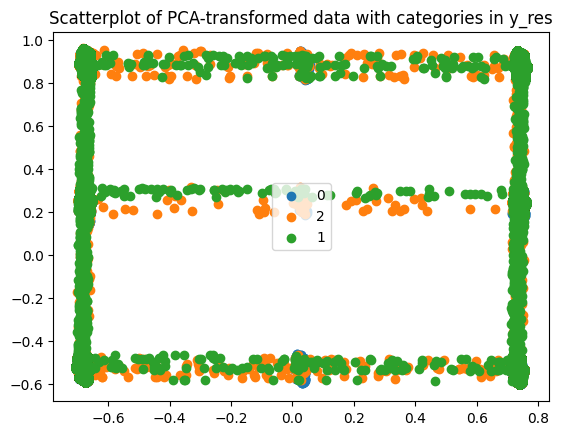

In [ ]:
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = where(y_res == label)[0]
    plt.scatter(X_res.iloc[row_ix, 0], X_res.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.title('Scatterplot of PCA-transformed data with categories in y_res')
plt.show()

Now we're good to go to modeling.

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

### Spot checking

In [ ]:
# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [ ]:
####################################################
# Spot-Check Algorithms
# for spot-checking, you generally accept defaults - just looking for a basic feel
# of whether or not you have predictive data...

models = []
models.append(('LR', LogisticRegression(max_iter=100000000))) # sometimes, for spot checking, you need to up the iterations!
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
##################################################
# evaluate each model in turn
results = []
names = []
seed = 123

for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.717053 (0.001093)
KNN: 0.691913 (0.001254)
CART: 0.618468 (0.001754)
NB: 0.691304 (0.001457)


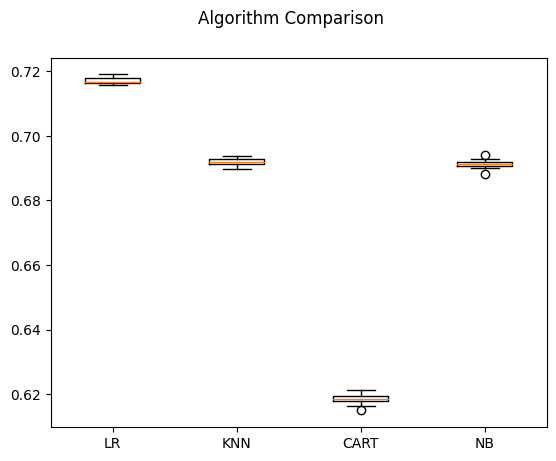

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.suptitle('Algorithm Comparison')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
#Importing modules
from sklearn.linear_model import LogisticRegression
#Classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Logistic Regression

In [ ]:
#Creating a variable to store the model
log_reg = LogisticRegression()
#Fitting the model on training data
log_reg = log_reg.fit(X_train_pca,y_train)
train_preds_lr = log_reg.predict(X_train_pca)
test_preds_lr = log_reg.predict(X_test_pca)

In [ ]:
#Checking raw probabilities
log_reg.predict_proba(X_train_pca)

array([[0.74858291, 0.05143423, 0.19998286],
       [0.56928739, 0.13997634, 0.29073627],
       [0.80113417, 0.04710677, 0.15175906],
       ...,
       [0.48423259, 0.12221798, 0.39354943],
       [0.54035704, 0.09244001, 0.36720295],
       [0.72507831, 0.05609554, 0.21882614]])

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split=28)
#Creating the hyperparameter grid

# Necessary imports
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, 15],
              "max_features": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
dtc = DecisionTreeClassifier()

# Instantiating RandomizedSearchCV object
dtc_cv = RandomizedSearchCV(dtc, param_dist, cv = 5)

dtc_cv.fit(X_train_pca, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtc_cv.best_params_))
print("Best score is {}".format(dtc_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 19, 'min_samples_leaf': 5}
Best score is 0.7169546413960391


In [ ]:
#dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=5, min_samples_leaf=4)

In [ ]:
#Fitting the model
dtc = dtc.fit(X_train_pca, y_train)

In [ ]:
#Storing predictions
train_preds_dtc = dtc.predict(X_train_pca)
test_preds_dtc = dtc.predict(X_test_pca)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rfc = RandomForestClassifier(min_samples_split=15)
#Fitting the model
rfc = rfc.fit(X_train_pca,y_train)
#Storing the predictions
train_preds_rfc = rfc.predict(X_train_pca)
test_preds_rfc = rfc.predict(X_test_pca)

In [ ]:
cm_rfc_train = confusion_matrix(y_train,train_preds_rfc)
print(cm_rfc_train)

[[488779    367   3270]
 [ 20519  26565   2995]
 [ 59992   1059  90901]]


## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.


### Logistic Regression

In [ ]:
train_results_lr = classification_report(y_train,train_preds_lr)
print(train_results_lr)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83    492416
           1       0.00      0.00      0.00     50079
           2       0.54      0.18      0.27    151952

    accuracy                           0.72    694447
   macro avg       0.42      0.38      0.36    694447
weighted avg       0.64      0.72      0.65    694447



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_results_lr = classification_report(y_test,test_preds_lr)
print(test_results_lr)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83    244522
           1       0.00      0.00      0.00     24772
           2       0.54      0.18      0.27     75597

    accuracy                           0.72    344891
   macro avg       0.42      0.38      0.36    344891
weighted avg       0.64      0.72      0.65    344891



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm_lr_train = confusion_matrix(y_train,train_preds_lr)
print(cm_lr_train)

[[471136      0  21280]
 [ 48404      0   1675]
 [125132      0  26820]]


In [ ]:
cm_lr_train_df = pd.DataFrame(cm_lr_train,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

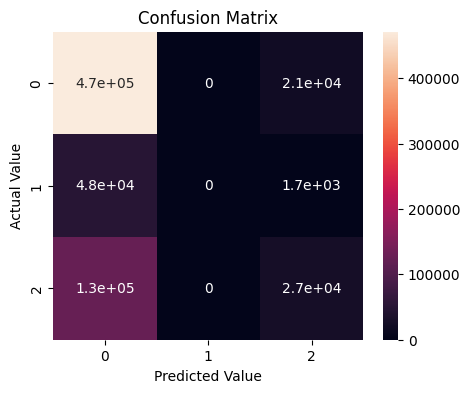

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr_train_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
cm_lr_test = confusion_matrix(y_test,test_preds_lr)
print(cm_lr_test)

[[233878      0  10644]
 [ 23937      0    835]
 [ 62254      0  13343]]


In [ ]:
cm_lr_test_df = pd.DataFrame(cm_lr_test,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

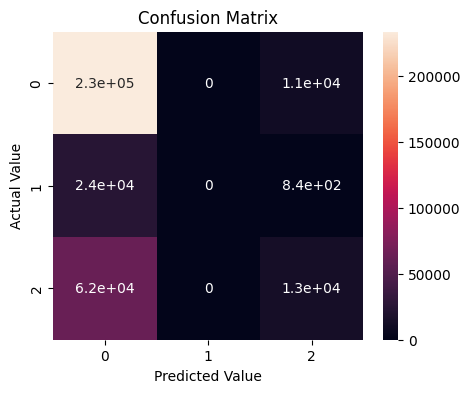

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr_test_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

### Decision Tree Classifier

In [ ]:
#Train confusion matrix
cm_dtc_train = confusion_matrix(y_train,train_preds_dtc)
print(cm_dtc_train)

[[492416      0      0]
 [     0  50079      0]
 [     0      0 151952]]


In [ ]:
cm_dtc_train_df = pd.DataFrame(cm_dtc_train,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

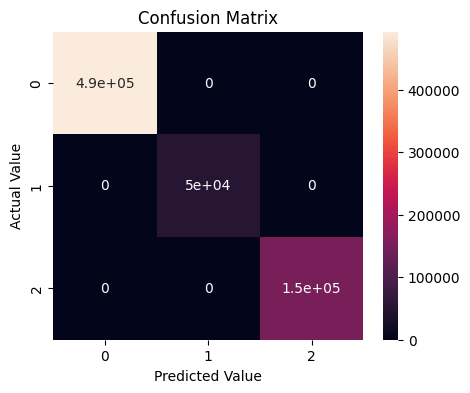

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_dtc_train_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
train_report_dtc = classification_report(y_train, train_preds_dtc)
print(train_report_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492416
           1       1.00      1.00      1.00     50079
           2       1.00      1.00      1.00    151952

    accuracy                           1.00    694447
   macro avg       1.00      1.00      1.00    694447
weighted avg       1.00      1.00      1.00    694447



In [ ]:
#Test confusion matrix
cm_dtc_test = confusion_matrix(y_test,test_preds_dtc)
print(cm_dtc_test)

[[183451  13141  47930]
 [ 12276   6438   6058]
 [ 45452   6091  24054]]


In [ ]:
cm_dtc_test_df = pd.DataFrame(cm_dtc_test,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

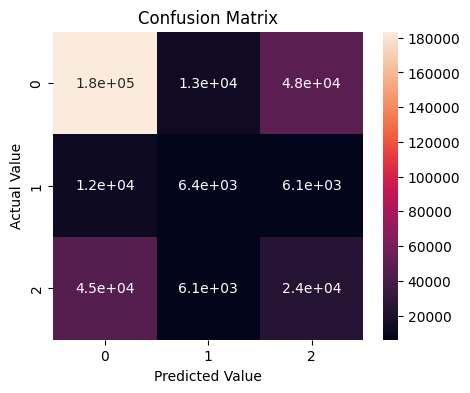

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_dtc_test_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
test_report_dtc = classification_report(y_test, test_preds_dtc)
print(test_report_dtc)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76    244522
           1       0.25      0.26      0.26     24772
           2       0.31      0.32      0.31     75597

    accuracy                           0.62    344891
   macro avg       0.44      0.44      0.44    344891
weighted avg       0.62      0.62      0.62    344891



In [ ]:
#Show the tree
#from sklearn.tree import export_graphviz
#from six import StringIO
#from IPython.display import Image
#import pydotplus

#dot_data = StringIO()
#export_graphviz(dtc,
                #out_file=dot_data,
                #filled=True, rounded=True,
                #special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

### Random Forest Classifier

In [ ]:
cm_rfc_train_df = pd.DataFrame(cm_rfc_train,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

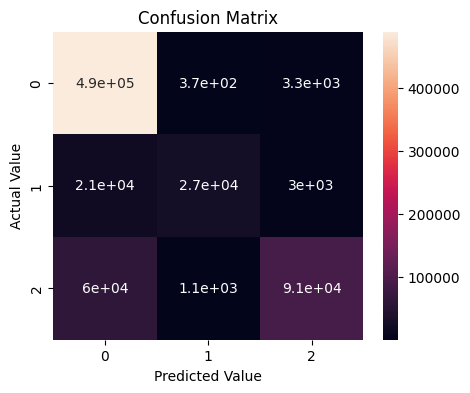

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_rfc_train_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
cm_rfc_test= confusion_matrix(y_test,test_preds_rfc)
print(cm_rfc_test)

[[224712   2990  16820]
 [ 19734   2464   2574]
 [ 56029   1418  18150]]


In [ ]:
cm_rfc_test_df = pd.DataFrame(cm_rfc_test,
                     index = ['0','1','2'],
                     columns = ['0','1','2'])

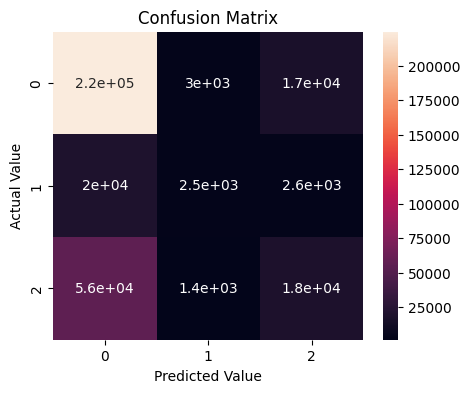

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_rfc_test_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
train_report_rfc = classification_report(y_train,train_preds_rfc)
print(train_report_rfc)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92    492416
           1       0.95      0.53      0.68     50079
           2       0.94      0.60      0.73    151952

    accuracy                           0.87    694447
   macro avg       0.91      0.71      0.78    694447
weighted avg       0.88      0.87      0.86    694447



In [ ]:
test_report_rfc = classification_report(y_test,test_preds_rfc)
print(test_report_rfc)

              precision    recall  f1-score   support

           0       0.75      0.92      0.82    244522
           1       0.36      0.10      0.16     24772
           2       0.48      0.24      0.32     75597

    accuracy                           0.71    344891
   macro avg       0.53      0.42      0.43    344891
weighted avg       0.66      0.71      0.67    344891



In [ ]:
#Creating empty place holders to store predictions
#my_results = []
#my_accuracy = []

In [ ]:
#Selecting 3 random columns from X as X_temp
#X_temp = X_train_pca.sample(n=3, axis='columns')
#print(X_temp)

Fitting a Decision Tree Model

In [ ]:
#clf = DecisionTreeClassifier(min_samples_leaf=20)
#clf = clf.fit(X_temp, y_train)

In [ ]:
#Predicting X data from X_temp
#preds = clf.predict(X_temp)
#print(preds)

In [ ]:
#Calculate error metrics
#errors = accuracy_score(y_train, preds)
#my_accuracy.append(errors)

In [ ]:
#For loop
#my_results = []
#my_accuracy = []

#for i in range(1000):
  #print(i)
  #X_temp = X_train_pca.sample(n=3,axis='columns', random_state=i)
  #Fitting the model
  #clf = DecisionTreeClassifier(min_samples_leaf=20)
  #clf = clf.fit(X_temp,y_train)
  #Predict the X data in X temp
  #errors = accuracy_score(y_train,preds)
  #Store the results
  #my_results.append(preds)
  #my_accuracy.append(errors)

## Interpretability and Discussion (30 points)
* Create permutation importance for top five variables
* Create partial dependence plots for top five variables
  * Don't forget about the `num_grid_points` argument to your PDP if it takes a long time to make the plot.
* You may add other tables/plots/analyses to help tell your story!
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.)
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.

In [ ]:
# these are the results dave got from a very simple model - you should be able to
# beat these results with some fine-tuning!

Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!